In [ ]:
from google.colab import drive
drive.mount('/content/drive')
zip_path = '/content/drive/MyDrive/SmartCityComplaintDataset_Renamed.zip'


Mounted at /content/drive


In [ ]:
import zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('complaint_dataset')
print("✅ Extracted:", zip_path)


✅ Extracted: /content/drive/MyDrive/SmartCityComplaintDataset_Renamed.zip


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os, zipfile
from google.colab import files
from IPython.display import display, clear_output
import ipywidgets as widgets
from PIL import Image as PILImage

In [ ]:
img_size = (224, 224)
# ✅ Step 3: Preprocess images
batch_size = 32
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    'complaint_dataset',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    'complaint_dataset',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 1178 images belonging to 4 classes.
Found 292 images belonging to 4 classes.


In [ ]:
# ✅ Step 4: Map class indices
index_to_class = {v: k for k, v in train_gen.class_indices.items()}
print("✅ Class Mapping:", index_to_class)

✅ Class Mapping: {0: 'Electricity', 1: 'Roads', 2: 'Sanitation', 3: 'Water'}


In [ ]:
# ✅ Step 5: Build Model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(len(index_to_class), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# ✅ Step 6: Train Model
history = model.fit(train_gen, validation_data=val_gen, epochs=10)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.7659 - loss: 0.7198 - val_accuracy: 0.8904 - val_loss: 0.3208
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 350ms/step - accuracy: 0.9537 - loss: 0.1252 - val_accuracy: 0.9110 - val_loss: 0.2517
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 347ms/step - accuracy: 0.9780 - loss: 0.0709 - val_accuracy: 0.9418 - val_loss: 0.1677
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 358ms/step - accuracy: 0.9931 - loss: 0.0371 - val_accuracy: 0.9452 - val_loss: 0.1593
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 15s 396ms/step - accuracy: 0.9981 - loss: 0.0206 - val_accuracy: 0.9315 - val_loss: 0.2104
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 357ms/step - accuracy: 0.9981 - loss: 0.0181 - val_accuracy: 0.9384 - val_loss: 0.1992
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 349ms/step - accuracy: 1.0000 - loss: 0.0103 - val_accuracy: 0.9384 - val_loss: 0.2031
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 354ms/step - accuracy: 1.0000 - loss: 0.0064 - val_accurac

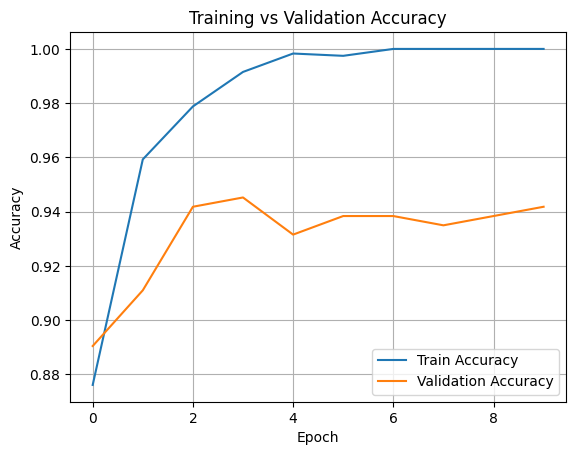

In [ ]:
# ✅ Step 7: Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 718ms/step


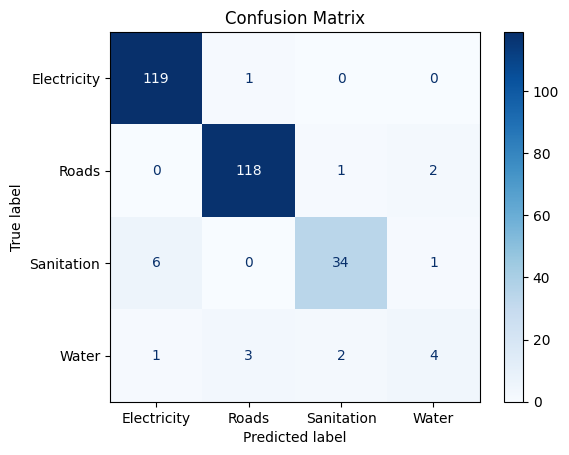

Validation Accuracy: 94.18%


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Reset validation generator
val_gen.reset()

# Get predictions
y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_gen.classes

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes, labels=np.arange(len(index_to_class)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(index_to_class.values()))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Calculate accuracy percentage
accuracy_percentage = np.mean(y_pred_classes == y_true) * 100
print(f"Validation Accuracy: {accuracy_percentage:.2f}%")


In [ ]:
model_save_path = '/content/drive/MyDrive/my_custom_model_name.keras'
model.save(model_save_path)
print(f"✅ Model saved in Google Drive at {model_save_path}")

✅ Model saved in Google Drive at /content/drive/MyDrive/my_custom_model_name.keras


In [ ]:
model_save_path = '/content/drive/MyDrive/my_custom_model_name.h5'
model.save(model_save_path)
print(f"✅ Model saved in Google Drive at {model_save_path}")

✅ Model saved in Google Drive at /content/drive/MyDrive/my_custom_model_name.h5


In [3]:
from google.colab import files
from tensorflow.keras.preprocessing import image
from IPython.display import clear_output
import ipywidgets as widgets
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os, zipfile
from google.colab import files
from IPython.display import display, clear_output
import ipywidgets as widgets
from PIL import Image as PILImage
# ✅ Step 9: Initialize complaint database
complaints = {
    'Roads': [],
    'Water': [],
    'Electricity': [],
    'Sanitation': []
}

# ✅ Step 10: Dashboard
def show_dashboard():
    clear_output()
    print("📊 Department-wise Complaint Dashboard:\n")
    for dept in complaints:
        dept_complaints = complaints[dept]
        print(f"🏢 {dept}: {len(dept_complaints)} complaint(s)")
        if not dept_complaints:
            print("  ❌ No complaints yet.")
        else:
            for i, c in enumerate(dept_complaints, 1):
                print(f"  {i}. {c['Name']} | {c['Phone']} | {c['Location']} | {c['Description']}")
        print("-" * 50)

# ✅ Step 11: View All Complaints
def view_all_complaints():
    clear_output()
    print("📋 All Registered Complaints:\n")
    count = 0
    for dept, comp_list in complaints.items():
        for comp in comp_list:
            count += 1
            print(f"{count}. [{dept}] {comp['Name']} - {comp['Phone']} - {comp['Location']} - {comp['Description']}")
    if count == 0:
        print("❌ No complaints registered.")
    print("-" * 50)

# ✅ Step 12: Complaint Registration Menu
def complaint_menu():
    clear_output()
    print("📝 Fill Complaint Details Below:")

    name = widgets.Text(description="Name:")
    phone = widgets.Text(description="Phone:")
    location = widgets.Text(description="Location:")
    description = widgets.Textarea(description="Issue:")
    upload_btn = widgets.Button(description="Upload Image", button_style="success")

    display(name, phone, location, description, upload_btn)

    def on_upload(b):
        clear_output()
        print("📸 Upload an image of the complaint (jpg/png)")
        uploaded_img = files.upload()

        for img_name in uploaded_img:
            try:
                img = image.load_img(img_name, target_size=img_size)
                img_array = image.img_to_array(img) / 255.0
                img_array = np.expand_dims(img_array, axis=0)

                pred = model.predict(img_array)
                class_index = np.argmax(pred)
                predicted_dept = index_to_class[class_index]

                print(f"\n🏢 Predicted Department: {predicted_dept}")
                display(PILImage.open(img_name))

                # Confirm complaint registration
                confirm = widgets.RadioButtons(options=["Yes", "No"], description="Register?")
                confirm_btn = widgets.Button(description="Submit", button_style="primary")

                def on_confirm(c):
                    clear_output()
                    if confirm.value == "Yes":
                        data = {
                            "Name": name.value,
                            "Phone": phone.value,
                            "Location": location.value,
                            "Description": description.value
                        }
                        complaints[predicted_dept].append(data)
                        print("✅ Complaint Registered!\n")
                    else:
                        print("❌ Complaint Not Registered.\n")
                    show_options_menu()

                display(confirm, confirm_btn)
                confirm_btn.on_click(on_confirm)

            except Exception as e:
                print("❌ Error during prediction:", e)

    upload_btn.on_click(on_upload)

# ✅ Step 13: Main Options Menu
def show_options_menu():
    print("📋 Choose an option:")
    option = widgets.RadioButtons(
        options=[
            "Register Another Complaint",
            "View All Complaints",
            "Dashboard",
            "Exit"
        ],
        description="Options:"
    )
    next_btn = widgets.Button(description="Proceed", button_style="info")

    def on_next(b):
        clear_output()
        if option.value == "Register Another Complaint":
            complaint_menu()
        elif option.value == "View All Complaints":
            view_all_complaints()
            show_options_menu()
        elif option.value == "Dashboard":
            show_dashboard()
            show_options_menu()
        elif option.value == "Exit":
            print("👋 Exiting. Thank you!")
        else:
            print("❌ Invalid option.")

    display(option, next_btn)
    next_btn.on_click(on_next)

# ✅ Start the application
complaint_menu()

📸 Upload an image of the complaint (jpg/png)


Saving sanitation2.jpg to sanitation2.jpg
❌ Error during prediction: name 'img_size' is not defined
